In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [7]:
df = sns.load_dataset("iris")

In [15]:
X  = df[[x for x in df.columns if x!='species']].values

In [16]:
y = df['species'].values

In [187]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [188]:
clf = RandomForestClassifier( verbose=True, max_features=2, n_estimators=10, criterion='entropy')

In [189]:
clf.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=True, warm_start=False)

In [190]:
dt = clf.estimators_[0]

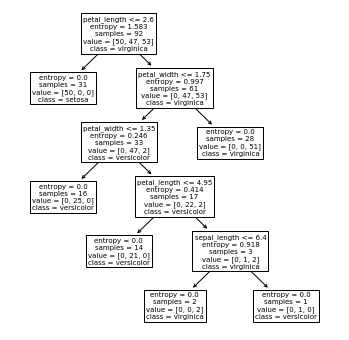

In [191]:
fig, ax = plt.subplots(figsize=(6, 6))

a = plot_tree(clf.estimators_[3], feature_names=df.columns[:-1], impurity=True, 
              fontsize=7, ax=ax, class_names=df[df.columns[-1]].unique(), )


In [192]:
dt.tree_.weighted_n_node_samples

array([150.,  48., 102.,  46.,  43.,   3.,  56.])

In [193]:
clf.feature_importances_

array([0.12090692, 0.02049188, 0.53622454, 0.32237666])

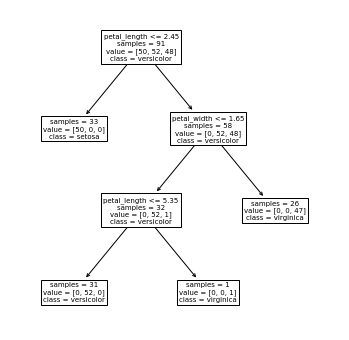

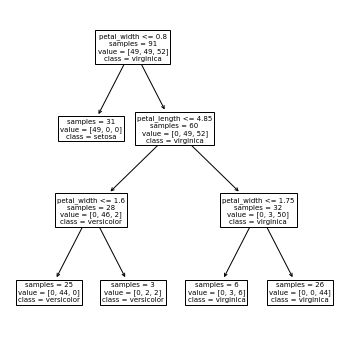

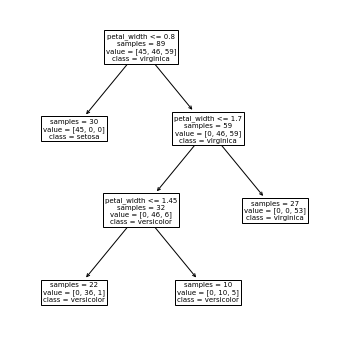

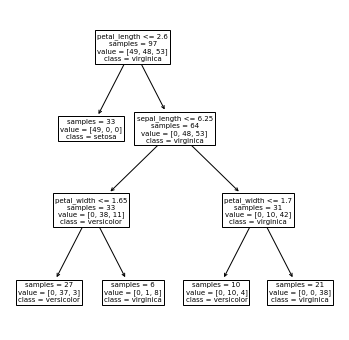

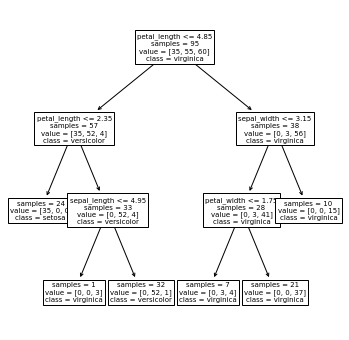

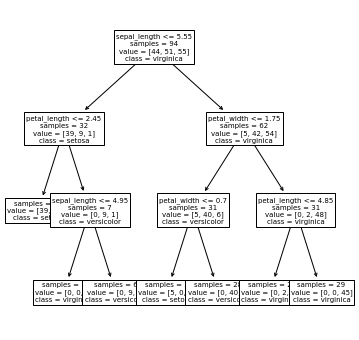

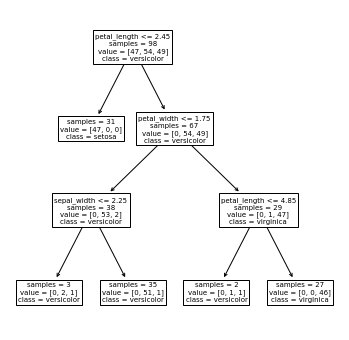

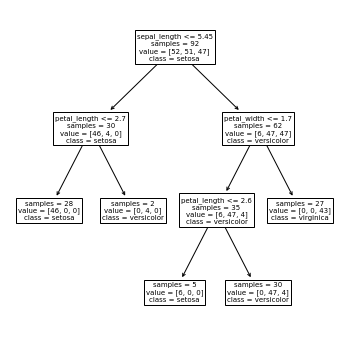

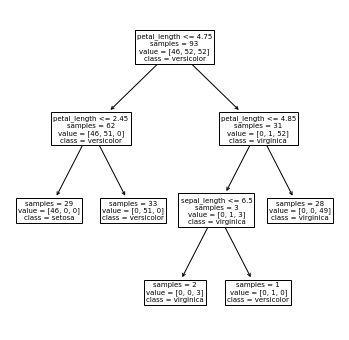

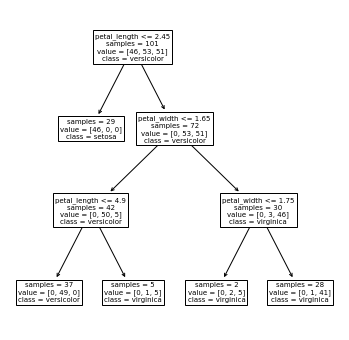

In [129]:
for i in range(10):
    fig, ax = plt.subplots(figsize=(6, 6))


    a = plot_tree(clf.estimators_[i], feature_names=df.columns[:-1], impurity=False, 
              fontsize=7, ax=ax, class_names=df[df.columns[-1]].unique())
    plt.savefig("tree-{}.pdf".format(i), transparent=True, bbox_inches="tight")
    #plt.clf()

In [103]:
a

'digraph Tree {\nnode [shape=box] ;\n0 [label="petal_length <= 2.6\\nsamples = 90\\nvalue = [51, 55, 44]\\nclass = versicolor"] ;\n1 [label="samples = 31\\nvalue = [51, 0, 0]\\nclass = setosa"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="petal_width <= 1.65\\nsamples = 59\\nvalue = [0, 55, 44]\\nclass = versicolor"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="samples = 33\\nvalue = [0, 54, 2]\\nclass = versicolor"] ;\n2 -> 3 ;\n4 [label="samples = 26\\nvalue = [0, 1, 42]\\nclass = virginica"] ;\n2 -> 4 ;\n}'

In [104]:
from sklearn.metrics import accuracy_score
accuracy_score(y, clf.predict(X))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


0.9666666666666667

In [105]:
accuracy_score(y, clf.classes_[clf.estimators_[4].predict(X).astype(int)])

0.9333333333333333

In [75]:
clf.classes_[clf.estimators_[2].predict(X).astype(int)]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor

In [55]:
clf.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [194]:
clf.feature_importances_

array([0.12090692, 0.02049188, 0.53622454, 0.32237666])

In [195]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

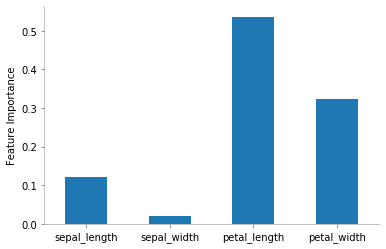

In [207]:
SPINE_COLOR = 'gray'
import pandas as pd
pd.Series(clf.feature_importances_, index=df.columns[:-1]).plot(kind='bar',rot=0)

def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

format_axes(plt.gca())
plt.ylabel("Feature Importance")
#plt.savefig("feature-importance.pdf",bbox_inches="tight",transparent=True)
import tikzplotlib
tikzplotlib.save("feature-importance.tex")

In [208]:
!cat feature-importance.tex

% This file was created by tikzplotlib v0.9.0.
\begin{tikzpicture}

\definecolor{color0}{rgb}{0.12156862745098,0.466666666666667,0.705882352941177}

\begin{axis}[
axis line style={white!50.1960784313725!black},
tick align=outside,
tick pos=left,
x grid style={white!69.0196078431373!black},
xmin=-0.5, xmax=3.5,
xtick style={color=white!50.1960784313725!black},
xtick={0,1,2,3},
xticklabels={sepal\_length,sepal\_width,petal\_length,petal\_width},
y grid style={white!69.0196078431373!black},
ylabel={Feature Importance},
ymin=0, ymax=0.563035764686882,
ytick style={color=white!50.1960784313725!black}
]
\draw[draw=none,fill=color0] (axis cs:-0.25,0) rectangle (axis cs:0.25,0.12090692189598);
\addlegendimage{ybar,ybar legend,draw=none,fill=color0};
\addlegendentry{None}

\draw[draw=none,fill=color0] (axis cs:0.75,0) rectangle (axis cs:1.25,0.0204918771734566);
\draw[draw=none,fill=color0] (axis cs:1.75,0) rectangle (axis cs:2.25,0.53622453779703);
\draw[draw=none,fill=color0] (axis cs:2.75,0)

In [92]:
from sklearn.tree import export_graphviz

In [141]:
for i in range(10):
    print("""
    \\begin{frame}{Decision Tree \# %d}
    \\begin{figure}
        \includegraphics[scale=0.7]{tree-%d.pdf}
    \end{figure}
    \\end{frame}\n"""%(i, i))


    \begin{frame}{Decision Tree \# 0}
    \begin{figure}
        \includegraphics[scale=0.7]{tree-0.pdf}
    \end{figure}
    \end{frame}


    \begin{frame}{Decision Tree \# 1}
    \begin{figure}
        \includegraphics[scale=0.7]{tree-1.pdf}
    \end{figure}
    \end{frame}


    \begin{frame}{Decision Tree \# 2}
    \begin{figure}
        \includegraphics[scale=0.7]{tree-2.pdf}
    \end{figure}
    \end{frame}


    \begin{frame}{Decision Tree \# 3}
    \begin{figure}
        \includegraphics[scale=0.7]{tree-3.pdf}
    \end{figure}
    \end{frame}


    \begin{frame}{Decision Tree \# 4}
    \begin{figure}
        \includegraphics[scale=0.7]{tree-4.pdf}
    \end{figure}
    \end{frame}


    \begin{frame}{Decision Tree \# 5}
    \begin{figure}
        \includegraphics[scale=0.7]{tree-5.pdf}
    \end{figure}
    \end{frame}


    \begin{frame}{Decision Tree \# 6}
    \begin{figure}
        \includegraphics[scale=0.7]{tree-6.pdf}
    \end{figure}
    \end{frame}


    \begin{frame}{D